In [2]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import glob

In [7]:
path_list = glob.glob(r'D:\DUIH-AWS\mri-label\*')
len(path_list), path_list[0]


(164, 'D:\\DUIH-AWS\\mri-label\\DUIH_0001')

(256, 256, 256) [  0   2   3   4   5   7   8  10  11  12  13  14  15  16  17  18  24  26
  28  30  31  41  42  43  44  46  47  49  50  51  52  53  54  58  60  62
  63  77  85 251 252 253 254 255]


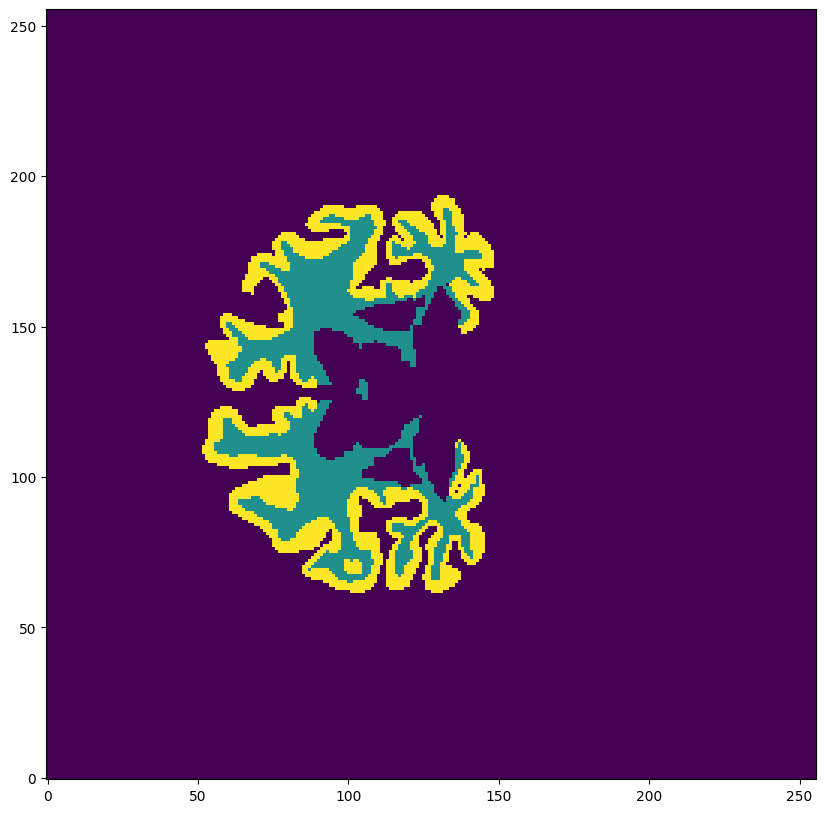

In [3]:
mask_fname = aseg_list[1]
mask = np.array(nib.load(mask_fname).dataobj)
print(mask.shape, np.unique(mask))
mask[mask==3]=1000 # L Cortex
mask[mask==42]=1000 # R Cortex
mask[mask==2]=1001 # L Cortex
mask[mask==41]=1001 # R Cortex
mask[mask<255]=0
mask[mask==1000] = 255
mask[mask==1001] = 128
plt.figure(figsize=(10,10))
plt.imshow((mask[...,128]), origin='lower')
plt.show()

# print(len(np.unique(mask)),np.unique(mask), mask.shape)

In [8]:
# mask_fname = aseg_list[1]
# print(mask_fname)

# dir_path = '/'.join(mask_fname.split('/')[:-1])

from tqdm import tqdm

for dir_path in tqdm(path_list):
    # dir_path = '/'.join(mask_fname.split('/')[:-1])
    # aseg.mgz
    
    aseg = f'{dir_path}\\aseg.mgz'
    t1 = f'{dir_path}\\T1.mgz'
    
    aseg_nib = nib.load(aseg)
    mask = np.array(aseg_nib.dataobj)
    mask[mask==3]=1000 # L Cortex
    mask[mask==42]=1000 # R Cortex
    mask[mask==2]=1001 # L Cortex
    mask[mask==41]=1001 # R Cortex
    
    
    mask[mask<1000]=0  # background
    mask[mask==1000] = 1 # WM
    mask[mask==1001] = 2
    
    mask = mask.astype(np.uint8)
    print(np.unique(mask))
    
    mask = nib.Nifti1Image(mask, aseg_nib.affine, aseg_nib.header) # affien transform -> None, 귀찮음
    
    nib.save(mask, f'{dir_path}/aseg.nii.gz')
    
    t1_nib = nib.load(t1)
    arr = np.array(t1_nib.dataobj)
    
    nifti_img = nib.Nifti1Image(arr, t1_nib.affine, t1_nib.header)
    
    nib.save(nifti_img, f'{dir_path}/T1.nii.gz')



  0%|          | 0/164 [00:00<?, ?it/s]

[0 1 2]


  1%|          | 1/164 [00:01<03:35,  1.32s/it]

[0 1 2]


  1%|          | 2/164 [00:02<03:33,  1.32s/it]

[0 1 2]


  2%|▏         | 3/164 [00:03<03:29,  1.30s/it]

[0 1 2]


  2%|▏         | 4/164 [00:05<03:26,  1.29s/it]

[0 1 2]


  3%|▎         | 5/164 [00:06<03:22,  1.28s/it]

[0 1 2]


  4%|▎         | 6/164 [00:07<03:18,  1.26s/it]

[0 1 2]


  4%|▍         | 7/164 [00:08<03:14,  1.24s/it]

[0 1 2]


  5%|▍         | 8/164 [00:10<03:14,  1.25s/it]

[0 1 2]


  5%|▌         | 9/164 [00:11<03:12,  1.24s/it]

[0 1 2]


  6%|▌         | 10/164 [00:12<03:11,  1.24s/it]

[0 1 2]


  7%|▋         | 11/164 [00:13<03:13,  1.27s/it]

[0 1 2]


  7%|▋         | 12/164 [00:15<03:13,  1.27s/it]

[0 1 2]


  8%|▊         | 13/164 [00:16<03:14,  1.29s/it]

[0 1 2]


  9%|▊         | 14/164 [00:17<03:13,  1.29s/it]

[0 1 2]


  9%|▉         | 15/164 [00:19<03:10,  1.28s/it]

[0 1 2]


 10%|▉         | 16/164 [00:20<03:09,  1.28s/it]

[0 1 2]


 10%|█         | 17/164 [00:21<03:20,  1.36s/it]

[0 1 2]


 11%|█         | 18/164 [00:23<03:39,  1.50s/it]

[0 1 2]


 12%|█▏        | 19/164 [00:25<03:48,  1.58s/it]

[0 1 2]


 12%|█▏        | 20/164 [00:27<03:55,  1.63s/it]

[0 1 2]


 13%|█▎        | 21/164 [00:28<03:56,  1.65s/it]

[0 1 2]


 13%|█▎        | 22/164 [00:30<03:53,  1.64s/it]

[0 1 2]


 14%|█▍        | 23/164 [00:32<03:58,  1.69s/it]

[0 1 2]


 15%|█▍        | 24/164 [00:34<04:00,  1.72s/it]

[0 1 2]


 15%|█▌        | 25/164 [00:36<04:04,  1.76s/it]

[0 1 2]


 16%|█▌        | 26/164 [00:37<04:00,  1.74s/it]

[0 1 2]


 16%|█▋        | 27/164 [00:39<03:57,  1.73s/it]

[0 1 2]


 17%|█▋        | 28/164 [00:41<03:53,  1.72s/it]

[0 1 2]


 18%|█▊        | 29/164 [00:42<03:52,  1.72s/it]

[0 1 2]


 18%|█▊        | 30/164 [00:44<03:55,  1.76s/it]

[0 1 2]


 19%|█▉        | 31/164 [00:46<03:54,  1.76s/it]

[0 1 2]


 20%|█▉        | 32/164 [00:48<03:55,  1.78s/it]

[0 1 2]


 20%|██        | 33/164 [00:49<03:44,  1.71s/it]

[0 1 2]


 21%|██        | 34/164 [00:51<03:26,  1.59s/it]

[0 1 2]


 21%|██▏       | 35/164 [00:52<03:12,  1.49s/it]

[0 1 2]


 22%|██▏       | 36/164 [00:53<03:01,  1.42s/it]

[0 1 2]


 23%|██▎       | 38/164 [00:56<02:46,  1.32s/it]

[0 1 2]
[0 1 2]


 24%|██▍       | 39/164 [00:57<02:42,  1.30s/it]

[0 1 2]


 24%|██▍       | 40/164 [00:58<02:37,  1.27s/it]

[0 1 2]


 25%|██▌       | 41/164 [00:59<02:35,  1.27s/it]

[0 1 2]


 26%|██▌       | 42/164 [01:01<02:32,  1.25s/it]

[0 1 2]


 26%|██▌       | 43/164 [01:02<02:31,  1.25s/it]

[0 1 2]


 27%|██▋       | 44/164 [01:03<02:29,  1.24s/it]

[0 1 2]


 27%|██▋       | 45/164 [01:04<02:25,  1.22s/it]

[0 1 2]


 28%|██▊       | 46/164 [01:05<02:23,  1.21s/it]

[0 1 2]


 29%|██▊       | 47/164 [01:07<02:23,  1.22s/it]

[0 1 2]


 29%|██▉       | 48/164 [01:08<02:21,  1.22s/it]

[0 1 2]


 30%|██▉       | 49/164 [01:09<02:20,  1.22s/it]

[0 1 2]


 30%|███       | 50/164 [01:10<02:21,  1.24s/it]

[0 1 2]


 31%|███       | 51/164 [01:12<02:18,  1.23s/it]

[0 1 2]


 32%|███▏      | 52/164 [01:13<02:18,  1.23s/it]

[0 1 2]


 32%|███▏      | 53/164 [01:14<02:18,  1.24s/it]

[0 1 2]


 33%|███▎      | 54/164 [01:15<02:17,  1.25s/it]

[0 1 2]


 34%|███▎      | 55/164 [01:17<02:23,  1.32s/it]

[0 1 2]


 34%|███▍      | 56/164 [01:18<02:21,  1.31s/it]

[0 1 2]


 35%|███▍      | 57/164 [01:19<02:19,  1.30s/it]

[0 1 2]


 35%|███▌      | 58/164 [01:21<02:15,  1.28s/it]

[0 1 2]


 36%|███▌      | 59/164 [01:22<02:13,  1.27s/it]

[0 1 2]


 37%|███▋      | 60/164 [01:23<02:12,  1.28s/it]

[0 1 2]


 37%|███▋      | 61/164 [01:24<02:11,  1.27s/it]

[0 1 2]


 38%|███▊      | 62/164 [01:26<02:10,  1.28s/it]

[0 1 2]


 38%|███▊      | 63/164 [01:27<02:09,  1.28s/it]

[0 1 2]


 39%|███▉      | 64/164 [01:28<02:06,  1.26s/it]

[0 1 2]


 40%|███▉      | 65/164 [01:29<02:04,  1.26s/it]

[0 1 2]


 40%|████      | 66/164 [01:31<02:03,  1.26s/it]

[0 1 2]


 41%|████      | 67/164 [01:32<02:01,  1.25s/it]

[0 1 2]


 41%|████▏     | 68/164 [01:33<01:59,  1.24s/it]

[0 1 2]


 42%|████▏     | 69/164 [01:34<01:56,  1.23s/it]

[0 1 2]


 43%|████▎     | 70/164 [01:36<02:00,  1.28s/it]

[0 1 2]


 43%|████▎     | 71/164 [01:37<01:59,  1.28s/it]

[0 1 2]


 44%|████▍     | 72/164 [01:38<01:59,  1.30s/it]

[0 1 2]


 45%|████▍     | 73/164 [01:40<01:58,  1.30s/it]

[0 1 2]


 45%|████▌     | 74/164 [01:41<01:54,  1.27s/it]

[0 1 2]


 46%|████▌     | 75/164 [01:42<01:51,  1.25s/it]

[0 1 2]


 46%|████▋     | 76/164 [01:43<01:50,  1.26s/it]

[0 1 2]


 47%|████▋     | 77/164 [01:45<01:49,  1.26s/it]

[0 1 2]


 48%|████▊     | 78/164 [01:46<01:48,  1.26s/it]

[0 1 2]


 48%|████▊     | 79/164 [01:47<01:45,  1.24s/it]

[0 1 2]


 49%|████▉     | 80/164 [01:48<01:42,  1.22s/it]

[0 1 2]


 50%|█████     | 82/164 [01:51<01:37,  1.19s/it]

[0 1 2]
[0 1 2]


 51%|█████     | 83/164 [01:52<01:36,  1.19s/it]

[0 1 2]


 51%|█████     | 84/164 [01:53<01:33,  1.17s/it]

[0 1 2]


 52%|█████▏    | 85/164 [01:54<01:33,  1.18s/it]

[0 1 2]


 52%|█████▏    | 86/164 [01:55<01:31,  1.17s/it]

[0 1 2]


 53%|█████▎    | 87/164 [01:56<01:30,  1.18s/it]

[0 1 2]


 54%|█████▎    | 88/164 [01:58<01:29,  1.17s/it]

[0 1 2]


 54%|█████▍    | 89/164 [01:59<01:28,  1.18s/it]

[0 1 2]


 55%|█████▌    | 91/164 [02:01<01:24,  1.16s/it]

[0 1 2]
[0 1 2]


 56%|█████▌    | 92/164 [02:02<01:23,  1.16s/it]

[0 1 2]


 57%|█████▋    | 93/164 [02:03<01:23,  1.18s/it]

[0 1 2]


 57%|█████▋    | 94/164 [02:05<01:22,  1.18s/it]

[0 1 2]


 58%|█████▊    | 95/164 [02:06<01:21,  1.18s/it]

[0 1 2]


 59%|█████▊    | 96/164 [02:07<01:19,  1.17s/it]

[0 1 2]


 59%|█████▉    | 97/164 [02:08<01:17,  1.16s/it]

[0 1 2]


 60%|█████▉    | 98/164 [02:09<01:16,  1.16s/it]

[0 1 2]


 60%|██████    | 99/164 [02:10<01:15,  1.16s/it]

[0 1 2]


 61%|██████    | 100/164 [02:12<01:14,  1.16s/it]

[0 1 2]


 62%|██████▏   | 101/164 [02:13<01:13,  1.16s/it]

[0 1 2]


 63%|██████▎   | 103/164 [02:15<01:09,  1.14s/it]

[0 1 2]
[0 1 2]


 64%|██████▍   | 105/164 [02:17<01:07,  1.15s/it]

[0 1 2]
[0 1 2]


 65%|██████▍   | 106/164 [02:19<01:07,  1.16s/it]

[0 1 2]


 65%|██████▌   | 107/164 [02:20<01:06,  1.17s/it]

[0 1 2]


 66%|██████▌   | 108/164 [02:21<01:05,  1.16s/it]

[0 1 2]


 66%|██████▋   | 109/164 [02:22<01:04,  1.17s/it]

[0 1 2]


 67%|██████▋   | 110/164 [02:23<01:03,  1.17s/it]

[0 1 2]


 68%|██████▊   | 111/164 [02:24<01:02,  1.19s/it]

[0 1 2]


 68%|██████▊   | 112/164 [02:26<01:01,  1.19s/it]

[0 1 2]


 69%|██████▉   | 113/164 [02:27<01:00,  1.19s/it]

[0 1 2]


 70%|██████▉   | 114/164 [02:28<00:58,  1.18s/it]

[0 1 2]


 70%|███████   | 115/164 [02:29<00:57,  1.17s/it]

[0 1 2]


 71%|███████   | 116/164 [02:30<00:55,  1.16s/it]

[0 1 2]


 71%|███████▏  | 117/164 [02:31<00:54,  1.16s/it]

[0 1 2]


 72%|███████▏  | 118/164 [02:33<00:53,  1.16s/it]

[0 1 2]


 73%|███████▎  | 119/164 [02:34<00:53,  1.18s/it]

[0 1 2]


 73%|███████▎  | 120/164 [02:35<00:51,  1.18s/it]

[0 1 2]


 74%|███████▍  | 121/164 [02:36<00:50,  1.17s/it]

[0 1 2]


 74%|███████▍  | 122/164 [02:37<00:49,  1.17s/it]

[0 1 2]


 75%|███████▌  | 123/164 [02:38<00:47,  1.16s/it]

[0 1 2]


 76%|███████▌  | 124/164 [02:40<00:46,  1.17s/it]

[0 1 2]


 76%|███████▌  | 125/164 [02:41<00:45,  1.18s/it]

[0 1 2]


 77%|███████▋  | 126/164 [02:42<00:44,  1.18s/it]

[0 1 2]


 77%|███████▋  | 127/164 [02:43<00:43,  1.18s/it]

[0 1 2]


 78%|███████▊  | 128/164 [02:44<00:42,  1.17s/it]

[0 1 2]


 79%|███████▊  | 129/164 [02:46<00:41,  1.18s/it]

[0 1 2]


 79%|███████▉  | 130/164 [02:47<00:40,  1.20s/it]

[0 1 2]


 80%|███████▉  | 131/164 [02:48<00:39,  1.20s/it]

[0 1 2]


 80%|████████  | 132/164 [02:49<00:38,  1.20s/it]

[0 1 2]


 81%|████████  | 133/164 [02:50<00:37,  1.20s/it]

[0 1 2]


 82%|████████▏ | 134/164 [02:52<00:35,  1.20s/it]

[0 1 2]


 82%|████████▏ | 135/164 [02:53<00:34,  1.20s/it]

[0 1 2]


 83%|████████▎ | 136/164 [02:54<00:33,  1.19s/it]

[0 1 2]


 84%|████████▎ | 137/164 [02:55<00:31,  1.18s/it]

[0 1 2]


 84%|████████▍ | 138/164 [02:56<00:31,  1.19s/it]

[0 1 2]


 85%|████████▍ | 139/164 [02:58<00:29,  1.19s/it]

[0 1 2]


 85%|████████▌ | 140/164 [02:59<00:28,  1.17s/it]

[0 1 2]


 86%|████████▌ | 141/164 [03:00<00:26,  1.17s/it]

[0 1 2]


 87%|████████▋ | 143/164 [03:02<00:24,  1.16s/it]

[0 1 2]
[0 1 2]


 88%|████████▊ | 144/164 [03:03<00:23,  1.17s/it]

[0 1 2]


 88%|████████▊ | 145/164 [03:04<00:22,  1.18s/it]

[0 1 2]


 90%|████████▉ | 147/164 [03:07<00:20,  1.19s/it]

[0 1 2]
[0 1 2]


 90%|█████████ | 148/164 [03:08<00:19,  1.20s/it]

[0 1 2]


 91%|█████████ | 149/164 [03:09<00:18,  1.20s/it]

[0 1 2]


 91%|█████████▏| 150/164 [03:11<00:16,  1.20s/it]

[0 1 2]


 92%|█████████▏| 151/164 [03:12<00:15,  1.19s/it]

[0 1 2]


 93%|█████████▎| 152/164 [03:13<00:14,  1.18s/it]

[0 1 2]


 93%|█████████▎| 153/164 [03:14<00:12,  1.18s/it]

[0 1 2]


 94%|█████████▍| 154/164 [03:15<00:11,  1.18s/it]

[0 1 2]


 95%|█████████▍| 155/164 [03:16<00:10,  1.18s/it]

[0 1 2]


 95%|█████████▌| 156/164 [03:18<00:09,  1.18s/it]

[0 1 2]


 96%|█████████▌| 157/164 [03:19<00:08,  1.20s/it]

[0 1 2]


 96%|█████████▋| 158/164 [03:20<00:07,  1.19s/it]

[0 1 2]


 97%|█████████▋| 159/164 [03:21<00:05,  1.20s/it]

[0 1 2]


 98%|█████████▊| 160/164 [03:22<00:04,  1.19s/it]

[0 1 2]


 99%|█████████▉| 162/164 [03:25<00:02,  1.18s/it]

[0 1 2]
[0 1 2]


 99%|█████████▉| 163/164 [03:26<00:01,  1.18s/it]

[0 1 2]


100%|██████████| 164/164 [03:27<00:00,  1.27s/it]


In [11]:

mask = np.array(nib.load('/root/snsb/data/mri/DUIH_0153/aseg.nii.gz').dataobj)
np.unique(mask)

array([0, 1, 2], dtype=uint8)